In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    from caas_jupyter_tools import display_dataframe_to_user
except Exception:
    display_dataframe_to_user = None

In [4]:
PATH = r"C:\Users\mudav\Downloads\OCD Patient Dataset_ Demographics & Clinical Data.csv"
df = pd.read_csv(PATH)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head()) 

Shape: (1500, 17)
Columns: ['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'OCD Diagnosis Date', 'Duration of Symptoms (months)', 'Previous Diagnoses', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,1500.0,NaN,NaN,NaN,5541.254,2562.389469,1017.0,3338.0,5539.5,7745.5,9995.0
Age,1500.0,NaN,NaN,NaN,46.781333,16.830321,18.0,32.0,47.0,61.0,75.0
Gender,1500,2,Male,753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,1500,4,Caucasian,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,1500,3,Single,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,1500,4,Some College,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCD Diagnosis Date,1500,1218,2017-06-21,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration of Symptoms (months),1500.0,NaN,NaN,NaN,121.745333,67.40461,6.0,64.0,121.0,178.0,240.0
Previous Diagnoses,1252,4,MDD,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family History of OCD,1500,2,Yes,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Top missing values:
 Medications                      386
Previous Diagnoses               248
Patient ID                         0
Ethnicity                          0
Age                                0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Gender                             0
Duration of Symptoms (months)      0
Family History of OCD              0
Compulsion Type                    0
Obsession Type                     0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
dtype: int64


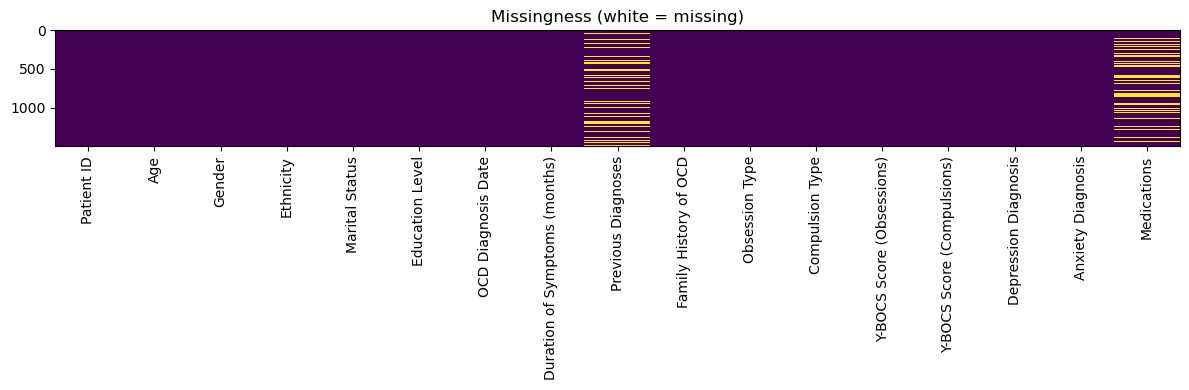

In [5]:
print(df.info())
display(df.describe(include='all').T)
missing = df.isnull().sum().sort_values(ascending=False)
print("Top missing values:\n", missing.head(20))
# Visualize missingness (simple)
plt.figure(figsize=(12,4))
plt.imshow(df.isnull(), aspect='auto', interpolation='nearest')
plt.title("Missingness (white = missing)")
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.tight_layout()
plt.show()

In [6]:
def find_col_by_keywords(cols, keywords):
    cols_lower = {c.lower():c for c in cols}
    for kw in keywords:
        for lowercol, orig in cols_lower.items():
            if kw in lowercol:
                return orig
    return None

age_col = find_col_by_keywords(df.columns, ["age"])
gender_col = find_col_by_keywords(df.columns, ["gender","sex"])
# candidate names for YBOCS-like total
severity_candidates = ["y-bocs","y-bocs total","y-bocs_total","ybocs","y-bocs_total","ybo cs total","y-bocs_total","ybocstotal","y-bocs-total","ybocs_total","ybocsscore","ybocstotal"]
severity_col = None
for c in df.columns:
    cl = c.lower().replace(" ", "").replace("-", "").replace("_","")
    if any(k.replace(" ","").replace("-","") in cl for k in ["ybocstotal","ybocs","ybocsscore","y-bocs"]):
        severity_col = c
        break

print("Detected columns -> Age:", age_col, " Gender:", gender_col, " Severity:", severity_col)


Detected columns -> Age: Age  Gender: Gender  Severity: Y-BOCS Score (Obsessions)


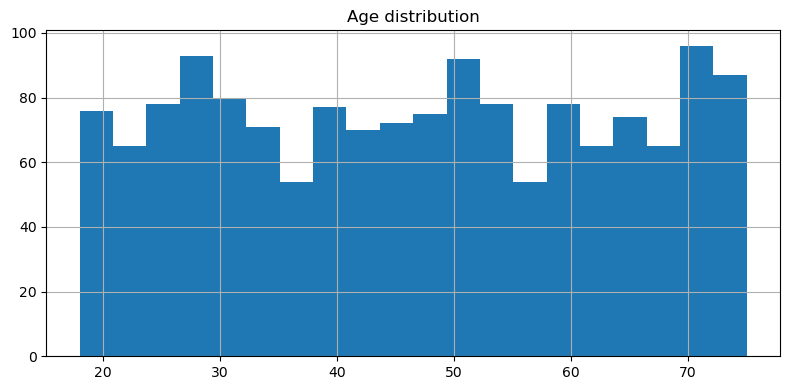

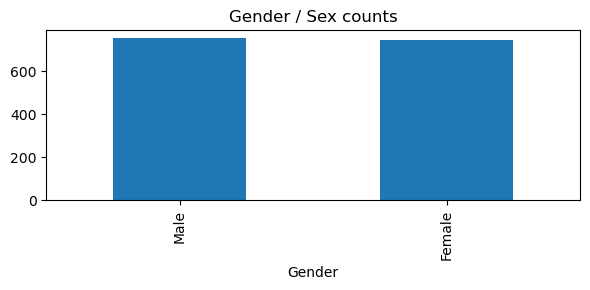

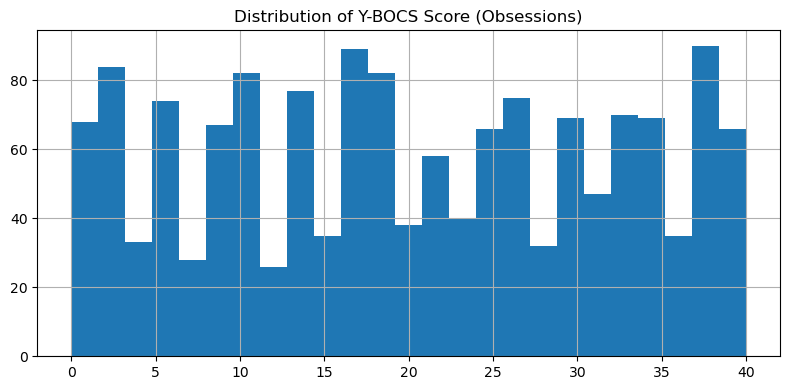

In [7]:
# Cell 5: basic visualizations: age, gender, severity
if age_col:
    plt.figure(figsize=(8,4))
    df[age_col].dropna().astype(float).hist(bins=20)
    plt.title("Age distribution")
    plt.tight_layout()
    plt.show()

if gender_col:
    plt.figure(figsize=(6,3))
    df[gender_col].fillna("Missing").value_counts().plot(kind='bar')
    plt.title("Gender / Sex counts")
    plt.tight_layout()
    plt.show()

if severity_col:
    plt.figure(figsize=(8,4))
    pd.to_numeric(df[severity_col], errors='coerce').dropna().hist(bins=25)
    plt.title(f"Distribution of {severity_col}")
    plt.tight_layout()
    plt.show()

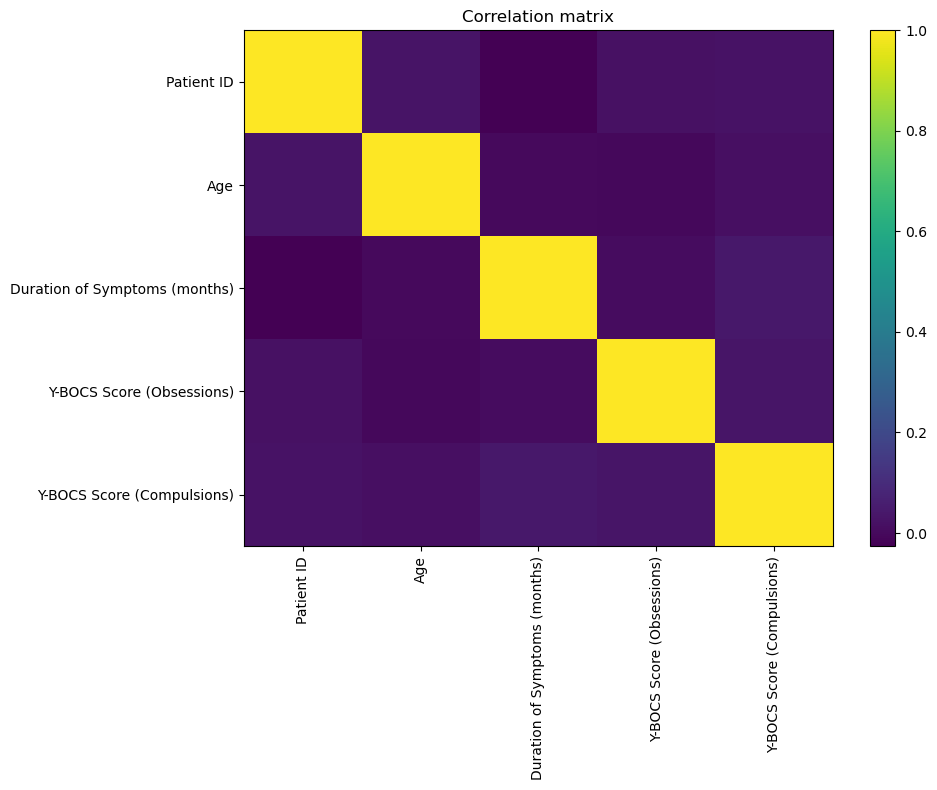

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    corr = numeric_df.corr()
    plt.figure(figsize=(10,8))
    plt.imshow(corr, interpolation='nearest', aspect='auto')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.title("Correlation matrix")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")

In [10]:
def select_features(df, exclude_targets=[]):
    numeric_feats = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_feats = [c for c in numeric_feats if c not in exclude_targets]
    id_candidates = [c for c in df.columns if any(x in c.lower() for x in ["id","patientid","record"])]
    numeric_feats = [c for c in numeric_feats if c not in id_candidates]
    categorical_candidates = [c for c in df.columns if any(x in c.lower() for x in ["gender","marital","education","ethnicity","race"])]
    return numeric_feats, categorical_candidates

In [14]:
target_numeric = severity_col 
target_binary = find_col_by_keywords(df.columns, ["depression", "anxiety", "depression diagnosis", "anxiety diagnosis"])
if target_numeric:
    print("Running example regression for target:", target_numeric)
    df[target_numeric] = pd.to_numeric(df[target_numeric], errors='coerce')
    numeric_feats, categorical_candidates = select_features(df, exclude_targets=[target_numeric])
    use_cols = [c for c in numeric_feats + categorical_candidates + [target_numeric] if c in df.columns]
    data = df[use_cols].dropna(subset=[target_numeric]).copy()
    print("Rows available for modelling:", data.shape[0])
    if data.shape[0] > 30:
        X = data[numeric_feats + categorical_candidates]
        y = data[target_numeric]
        num_transform = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
        cat_transform = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown='ignore'))])
        pre = ColumnTransformer([("num", num_transform, numeric_feats), ("cat", cat_transform, categorical_candidates)])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipe = Pipeline([("pre", pre), ("model", LinearRegression())])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        print("R2:", r2_score(y_test, preds))
        print("RMSE:", mean_squared_error(y_test, preds,))
    else:
        print("Not enough samples for regression.")
elif target_binary:
    print("Running example classification for target:", target_binary)
    y = df[target_binary].fillna("Missing").apply(lambda v: 1 if str(v).strip().lower() in ("yes","y","true","1","present","diagnosed") else (0 if str(v).strip().lower() in ("no","n","false","0","absent") else np.nan))
    df["y_bin_temp"] = y
    data = df.dropna(subset=["y_bin_temp"]).copy()
    print("Rows available for modelling:", data.shape[0])
    if data.shape[0] > 30:
        numeric_feats, categorical_candidates = select_features(data, exclude_targets=["y_bin_temp"])
        X = data[numeric_feats + categorical_candidates]
        y = data["y_bin_temp"].astype(int)
        num_transform = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
        cat_transform = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown='ignore'))])
        pre = ColumnTransformer([("num", num_transform, numeric_feats), ("cat", cat_transform, categorical_candidates)])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipe = Pipeline([("pre", pre), ("model", LogisticRegression(max_iter=1000))])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        print(classification_report(y_test, preds))
    else:
        print("Not enough labeled rows for classification.")
else:
    print("No clear supervised target found. Running KMeans clustering on numeric features.")
    numeric_df = df.select_dtypes(include=[np.number]).dropna(axis=0, how='any')
    if numeric_df.shape[0] > 20:
        scaler = StandardScaler()
        X = scaler.fit_transform(numeric_df)
        kmeans = KMeans(n_clusters=3, random_state=42)
        labels = kmeans.fit_predict(X)
        numeric_df["cluster"] = labels
        display(numeric_df.head())
        print("Cluster counts:\n", pd.Series(labels).value_counts())
    else:
        print("Not enough complete numeric rows for clustering.")

Running example regression for target: Y-BOCS Score (Obsessions)
Rows available for modelling: 1500
R2: -0.013636573317769907
RMSE: 149.13039110171806
